<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df=pd.read_csv('rainfall_prediction.csv')
df.head(3)

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,1,3.600000,1.000000,3.000000,14.225000,12.333333,82.000000,1028.100000,0
1,2,0.000000,7.200000,4.900000,23.075000,44.333333,69.500000,1015.650000,1
2,3,0.000000,0.600000,1.500000,10.175000,16.666667,87.000000,1026.450000,0


**The data definition is as follows:** <br>

**Obs_Id:** Observation Id

**Rainfall:** Rainfall recorded in a day (in mm) 

**Evaporation:** Number of field goals made 

**Sunshine:** Number of hours of bright sunshine per day

**Temp:** Temperature in degree C

**Wind_Speed:** Average speed of the wind in km/hour

**Humidity:** Humidity in percentage (%)

**Pressure:** Atmospheric pressure in hpa (hecto Pascals)

**Rain Tomorrow:** Whether it will rain or not(0 = No, it won't rain tomorrow, 1 = Yes, it will rain tomorrow) (target/dependent variable)

Our objective is to predict whether it will rain tomorrow or not.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify and remove the variables in the data which are insignificant for the classification analysis</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
print('Datatypes:', df.dtypes)
print('--'*12)
print(df.isnull().sum())
print('--'*12)
print(df.std())

# No Variables should be remove.

Datatypes: Obs_Id            int64
Rainfall        float64
Evaporation     float64
Sunshine        float64
Temp            float64
Wind_Speed      float64
Humidity        float64
Pressure        float64
RainTomorrow      int64
dtype: object
------------------------
Obs_Id          0
Rainfall        0
Evaporation     0
Sunshine        0
Temp            0
Wind_Speed      0
Humidity        0
Pressure        0
RainTomorrow    0
dtype: int64
------------------------
Obs_Id         438.930518
Rainfall         7.322329
Evaporation      3.639993
Sunshine         3.689090
Temp             6.380897
Wind_Speed       8.653705
Humidity        17.939610
Pressure         6.958099
RainTomorrow     0.393053
dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there any record that is recorded more than once? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# There is no record more than once.
df.columns.unique()

Index(['Obs_Id', 'Rainfall', 'Evaporation', 'Sunshine', 'Temp', 'Wind_Speed',
       'Humidity', 'Pressure', 'RainTomorrow'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any outliers present in the data? If yes, remove such observations using the quartiles of the variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

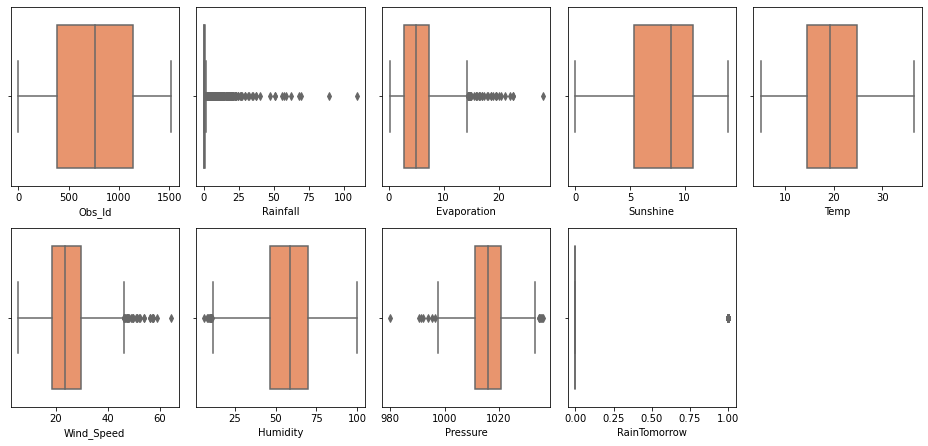

In [13]:
#Before Outliers
n=1
plt.figure(figsize=(13,12))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(4,5,n)
        n+=1
        sns.boxplot(df[i],palette='OrRd_r')
        plt.tight_layout()

In [14]:
# Capping.
for i in df.describe().columns:
    ll,q1,q3,ul=df[i].quantile([0.01,0.25,0.75,0.99])
    UC=q3+1.5*(q3-q1)
    LC=q1-1.5*(q3-q1)
    df[i]=df[i].map(lambda x: ll if x<LC else ul if x>UC else x)

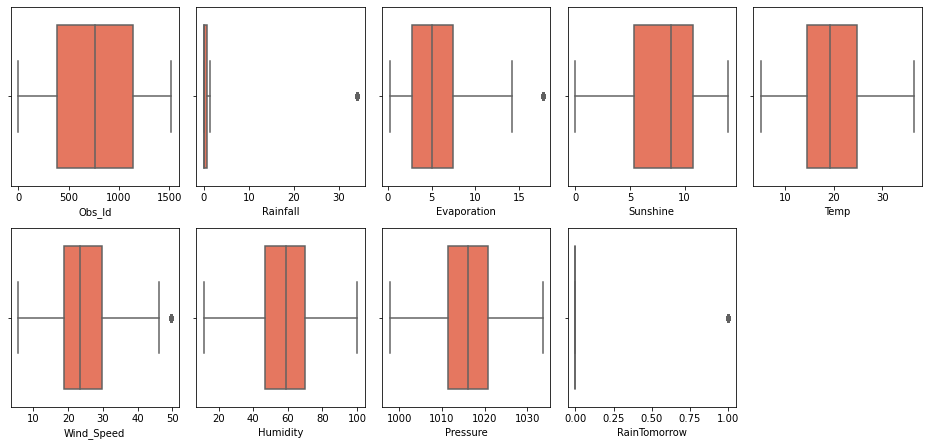

In [16]:
#After Outliers
n=1
plt.figure(figsize=(13,12))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(4,5,n)
        n+=1
        sns.boxplot(df[i],palette='Reds')
        plt.tight_layout()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is scaling required for the KNN algorithm? If yes, scale the data such that the range of each variable will be between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
df_feat=df.drop(columns=['RainTomorrow'])
df_target=df['RainTomorrow']

In [26]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [35]:
dat=mm.fit_transform(df_feat)
df_features = pd.DataFrame(dat,columns=df_feat.columns)
df_features.head(1)

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure
0,0.000000,1.000000,0.045652,0.214286,0.293281,0.151515,0.796610,0.847765


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a 7-NN model on 70% of the data using the 'Chebyshev' distance and find its accuracy 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
x_train,x_test,y_train,y_test=train_test_split(df_features,df_target,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1064, 8)
(456, 8)
(1064,)
(456,)


In [44]:
kkn_model=KNeighborsClassifier(n_neighbors=7,metric='chebyshev')
kkn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='chebyshev', n_neighbors=7)

In [40]:
y_pred=kkn_model.predict(x_test)

In [42]:
print(classification_report(y_test,y_pred))

# Accuracy is 0.82,so model is good.

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       360
         1.0       0.64      0.38      0.47        96

    accuracy                           0.82       456
   macro avg       0.75      0.66      0.68       456
weighted avg       0.81      0.82      0.81       456



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the best value of 'K' for the KNN model from the given list of values (use 5-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

K = [3, 5, 7, 9, 11, 13]

In [46]:
tuned_param=[{'n_neighbors':[3, 5, 7, 9, 11, 13]}]

In [47]:
kkn_model=KNeighborsClassifier()
grid_model=GridSearchCV(estimator=kkn_model,param_grid=tuned_param,cv=5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7, 9, 11, 13]}])

In [49]:
print('Best k value is:',grid_model.best_params_)

Best k value is: {'n_neighbors': 11}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a naive bayes model on 70% of the original data and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
naive_model=GaussianNB()
naive_model.fit(x_train,y_train)

GaussianNB()

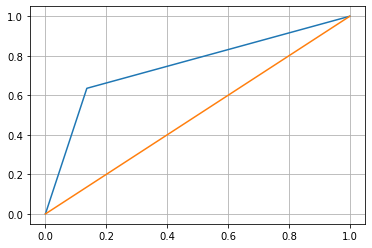

AUC Score: 0.7496527777777777


In [55]:
y_pred=naive_model.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.grid(True)
plt.show()
print('AUC Score:',metrics.roc_auc_score(y_test,y_pred))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which distance metric among 'manhattan', 'euclidean' and 'chebyshev' is suitable for the given dataset? (consider K = 19)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
tuned_param=[{'metric':['manhattan','euclidean','chebyshev']}]

In [60]:
kkn_model=KNeighborsClassifier(n_neighbors=19)
grid_model=GridSearchCV(estimator=kkn_model,param_grid=tuned_param)
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid=[{'metric': ['manhattan', 'euclidean', 'chebyshev']}])

In [62]:
print('Best parameters among given is :',grid_model.best_params_)

Best parameters among given is : {'metric': 'manhattan'}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the euclidean distance between the first observation of the dataframe 'X_test_scaled' and its five neighboring points in the train set (use for loop)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
distance = []
for i in np.arange(1,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    knn_model=knn.fit(x_train,y_train)
    val=knn_model.score(x_train,y_train)
    distance.append(val)
print(distance)

[1.0, 0.8834586466165414, 0.8984962406015038, 0.875]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the parameters obtained in Q8 to build the KNN model, and find the number of false predictions using the test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
kkn_model=KNeighborsClassifier(metric='manhattan')
kkn_model.fit(x_train,y_train)
y_pred=kkn_model.predict(x_test)

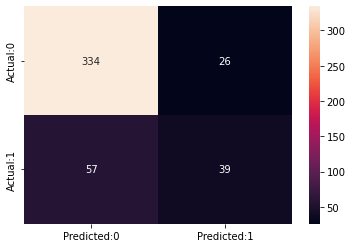

In [65]:
cm=confusion_matrix(y_test,y_pred)
matrix=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(matrix,annot=True,fmt='d')
plt.show()

In [66]:
# Matrix

FN=cm[1,0]
FP=cm[0,1]
TN=cm[0,0]
TP=cm[1,1]

In [68]:
#False Prediictions

false=(FN+FP)/(FN+FP+TN+TP)
print('NO.of false predictions:',false)

NO.of false predictions: 0.18201754385964913
